In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import integration as inte

Here the benefits of Importance sampling vis-a-vis uniform sampling will be demonstrated by comparing the 
variance vs the number of iteration in both cases. To start off, here we have a python program that does
Monte Carlo integration using importance sampling. In this program we feed a region and width of importance
and then the program draws the samples from a gaussian centered about the region of importance

In [2]:
def MonteCarloIntImp(f,a,b,mu,sig,N):
    """
    Monte Carlo Integration using importance sampling from a Gaussian
    ---------------------------
    INPUT: f:function to be integrated, a:lower limit, b:upper limit,mu:location of importance
    
    ,sig: width of important region, N: number of random numbers in the interval [a,b]

    OUTPUT:result of the integration
    
    """
    fbyp_X=[]
    i=0
    while i<N:
        xi=random.gauss(mu,sig)#drawing from a gaussian centered as mu and width sig
        if a<xi<b:
            i+=1
            fbyp_X.append(f(xi)/(math.exp(-((xi-mu)/sig)**2/2)/(sig*math.sqrt(2*math.pi))))
    fbyp_X2=[i**2 for i in fbyp_X]
    F_n=sum(fbyp_X)/N #The estimator
    stdev=math.sqrt(sum(fbyp_X2)/N - (F_n)**2) #the standard deviation of the sample
    return(F_n,stdev,fbyp_X)

Suppose we want to find the area under the curve $$\int_0^{10} e^{-2|x-5|} dx$$, from the plot given below it is clear that uniform distribution does not do a good job at signifying the weightage of each location of the integrand, whereas a gaussian centered at $x=5$ does a much better job at it.

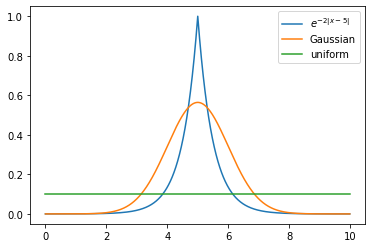

In [3]:
#The code for plotting the functions using MatplotLib
x=np.arange(0,10,0.01)
y=np.exp(-2*np.abs(x-5))
y1=np.exp(-((x-5)/1)**2/2)/np.sqrt(np.pi)
y2=np.exp(0*x)/10
plt.plot(x,y,label='$e^{-2|x-5|}$')
plt.plot(x,y1,label='Gaussian')
plt.plot(x,y2,label='uniform')
plt.legend()

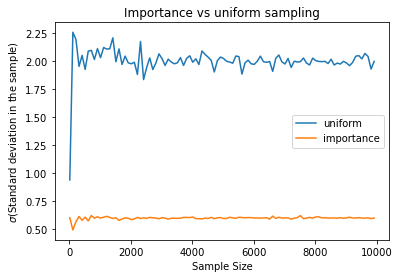

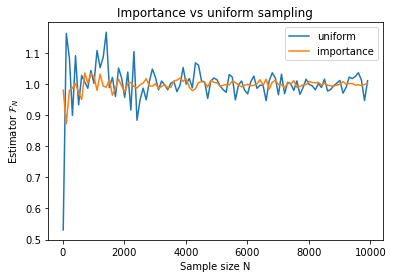

In [4]:
#The function be integrated
f=lambda x:math.exp(-2*abs(x-5))

#Monte carlo uniform sampling
I=[] #This list will contain the estimators at different values of N
st=[]#This list will contain the standard deviation of the samples
for N in range(10,10000,100):
    a=inte.MonteCarloInt(f,0,10,N)
    st.append(a[1])
    I.append(a[0])
plt.plot(range(10,10000,100),st,label='uniform')


#Monte carlo importance sampling
I1=[]#This list will contain the estimators at different values of N
st1=[]#This list will contain the standard deviation of the samples
a=0
b=10
for N in range(10,10000,100):
    c=MonteCarloIntImp(f,a,b,5,1,N)
    st1.append(c[1])
    I1.append(c[0])
#Just plotting parameters
plt.plot(range(10,10000,100),st1,label='importance')
plt.xlabel('Sample Size')
plt.ylabel('$\sigma$(Standard deviation in the sample)')
plt.title('Importance vs uniform sampling')
plt.legend()
plt.show()
plt.plot(range(10,10000,100),I,label='uniform')
plt.plot(range(10,10000,100),I1,label='importance')
plt.xlabel('Sample size N')
plt.ylabel('Estimator $\mathcal{F}_N$')
plt.title('Importance vs uniform sampling')
plt.legend()
plt.show()

The plot above confirms the fact that importance sampling does infact reduce the variance and thus gives us a value much closer to the actual one in far lesser iterations

The technique given above is useful but not general enough, if we want to sample from any distribution we have to generalise the code even further, which is done below.

In [5]:
def MonteCarloIntImpG(f,w,n,a,b,N):
    """
    Monte Carlo Integration
    ---------------------------
    input: f:function, 
    
      w: list of weights of the distribution at where ith index gives the weight at x=a+i(b-a)/n, 
    
      n: list containing integers from 0 to n-1 (i.e., [0,1,2,.....,n-1])

     ,a:lower limit, b: upper limit,

     N: number of random numbers in the interval [a,b]

    output:result of the integration
    
    """
    fbyp_X=[]
    m=len(n)
    for _ in range(N):
        i=random.choices(n,w)[0] #choosing a random element from the distribution
        xi=a+i*(b-a)/m           #finding the corresponding x value to the distribution
        fbyp_X.append(f(xi)/w[i])
    fbyp_X2=[i**2 for i in fbyp_X]
    F_n=sum(w)*(b-a)/m*sum(fbyp_X)/N #finding the estimator assuming non normalised weights
    stdev=math.sqrt(sum(fbyp_X2)/N*(sum(w)*(b-a)/m)**2 - (F_n)**2) #finding the error
    return(F_n,stdev)

Now we demonstrate the same problem as before using this general function

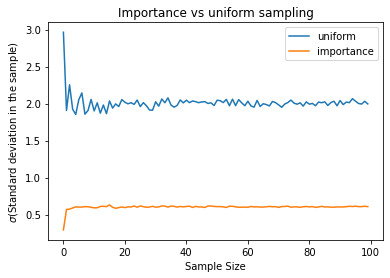

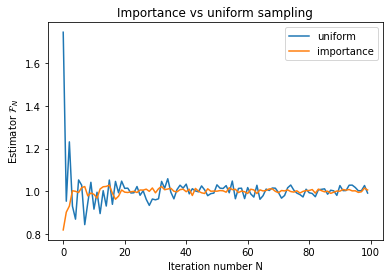

In [6]:
f=lambda x:math.exp(-2*abs(x-5))
#Monte carlo uniform sampling
I=[]
st=[]
for N in range(10,10000,100):
    a=inte.MonteCarloInt(f,0,10,N)
    st.append(a[1])
    I.append(a[0])
plt.plot(st,label='uniform')
#monte carlo imp sampling
#preparing the weight distribution
f=lambda x:math.exp(-2*abs(x-5))
w=lambda x:math.exp(-((x-5)/1)**2/2)/(1*math.sqrt(2*math.pi))
a=0
b=10
n=100
w=[w(a+i*(b-a)/n) for i in range(n)]#weights
n=[i for i in range(n)]
print()
I1=[]
st1=[]
for N in range(10,10000,100):
    c=MonteCarloIntImpG(f,w,n,a,b,N)
    st1.append(c[1])
    I1.append(c[0])
#Just plotting parameters
plt.plot(st1,label='importance')
plt.xlabel('Sample Size')
plt.ylabel('$\sigma$(Standard deviation in the sample)')
plt.title('Importance vs uniform sampling')
plt.legend()
plt.show()
plt.plot(I,label='uniform')
plt.plot(I1,label='importance')
plt.xlabel('Iteration number N')
plt.ylabel('Estimator $\mathcal{F}_N$')
plt.title('Importance vs uniform sampling')
plt.legend()
plt.show()

Once again, we see the value of importance sampling in improving accuracy by reducing the variance

Here we have one more example that demonstrates the usefulness of Importance sampling. Suppose we want to evaluate, $$\int_{-\pi}^{\pi} \sin^2 x dx$$
As before, we estimate the curve approximately, by the normalised distribution(over $(-\infty,\infty)$),
$$\frac{0.8^{5/2}\cdot 4x^4e^{-0.8x^2}}{3\sqrt{\pi}}$$
which resembles the curve much closely in comparison to uniform distribution

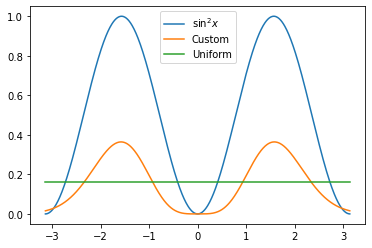

In [13]:
X=np.arange(-np.pi,np.pi,0.01)
Y=np.sin(X)**2
#Y2=random.choices(X,Y,k=10000)
Y2=X**4*np.exp(-0.8*X**2)/2.32226
Y3=X**0/(2*np.pi)
#plt.hist(Y2)
plt.plot(X,Y,label='$\sin^2x$')
plt.plot(X,Y2,label='Custom')
plt.plot(X,Y3,label='Uniform')
plt.legend()

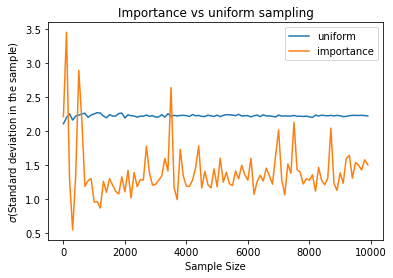

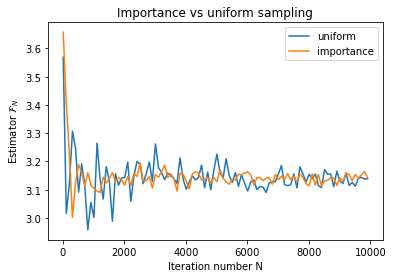

In [17]:
f=lambda x:math.sin(x)**2
#Monte carlo uniform sampling
I=[]
st=[]
for N in range(10,10000,100):
    a=inte.MonteCarloInt(f,-math.pi,math.pi,N)
    st.append(a[1])
    I.append(a[0])
plt.plot(range(10,10000,100),st,label='uniform')
#monte carlo imp sampling
#preparing the weights
w=lambda x:x**4*math.exp(-0.8*x**2)#taking non normalised for demonstration
a=-math.pi
b=math.pi
n=100
w=[w(a+i*(b-a)/n) for i in range(n)]#weights
n=[i for i in range(n)]
I1=[]
st1=[]
for N in range(10,10000,100):
    c=MonteCarloIntImpG(f,w,n,a,b,N)
    st1.append(c[1])
    I1.append(c[0])
#Just plotting parameters
plt.plot(range(10,10000,100),st1,label='importance')
plt.xlabel('Sample Size')
plt.ylabel('$\sigma$(Standard deviation in the sample)')
plt.title('Importance vs uniform sampling')
plt.legend()
plt.show()
plt.plot(range(10,10000,100),I,label='uniform')
plt.plot(range(10,10000,100),I1,label='importance')
plt.xlabel('Iteration number N')
plt.ylabel('Estimator $\mathcal{F}_N$')
plt.title('Importance vs uniform sampling')
plt.legend()
plt.show()

The plots above demonstrate that importance sampling yields, for the most part, a lower variance as compared to uniform sampling, choosing a better distribution function can improve the results

$$-----------------\mathcal{Fin}---------------------$$